In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [2]:
# Load the dataset
url = 'https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv'
data = pd.read_csv(url)

In [3]:
# Split the data into features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
####BUILDING A RANDOM MODEL
model=KNeighborsClassifier()
model.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [6]:
y_pred_train=model.predict(X_train_scaled)
y_pred_test=model.predict(X_test_scaled)

In [7]:
print("classification report for training data")
print(classification_report(y_train,y_pred_train))
print("classification report for testing data")
print(classification_report(y_test,y_pred_test))

classification report for training data
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       400
           1       0.77      0.63      0.69       214

    accuracy                           0.81       614
   macro avg       0.80      0.76      0.78       614
weighted avg       0.80      0.81      0.80       614

classification report for testing data
              precision    recall  f1-score   support

           0       0.75      0.80      0.78       100
           1       0.58      0.52      0.55        54

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.70      0.70       154



In [10]:
import numpy as np
np.sqrt(X_train_scaled.shape[0])

np.float64(24.779023386727733)

In [11]:
from sklearn.metrics import f1_score
k_value=[]
train_f1_score=[]
test_f1_score=[]
for i in range(1,24,2):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train_scaled,y_train)
    y_pred_train=model.predict(X_train_scaled)
    y_pred_test=model.predict(X_test_scaled)
    train_f1=f1_score(y_train,y_pred_train)
    test_f1=f1_score(y_test,y_pred_test)
    k_value.append(i)
    train_f1_score.append(train_f1)
    test_f1_score.append(test_f1)

In [14]:
test_f1_score

[0.5714285714285714,
 0.5523809523809524,
 0.5490196078431373,
 0.6138613861386139,
 0.594059405940594,
 0.5904761904761905,
 0.6336633663366337,
 0.6274509803921569,
 0.5894736842105263,
 0.6105263157894737,
 0.574468085106383,
 0.5806451612903226]

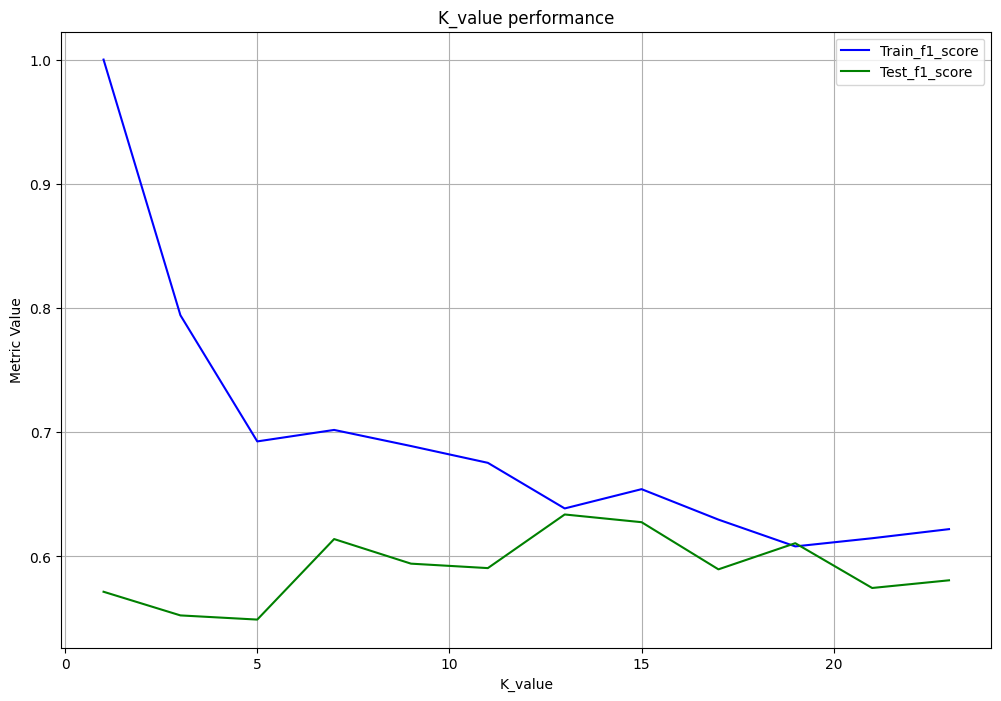

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.plot(k_value, train_f1_score, label='Train_f1_score', color='blue')
plt.plot(k_value, test_f1_score, label='Test_f1_score', color='green')
plt.title('K_value performance')
plt.xlabel('K_value')
plt.ylabel('Metric Value')
plt.legend()
plt.grid()
plt.savefig("output1.jpg")
plt.show()